In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## İnformation About Data

**cont_rating**:Content rating is the age rating for example if the content is acceptable for people over 18 year old. User rating is how users rated the apps for example 5 stars

**ratingcounttot**: User Rating counts (for all version)

**ratingcountver**: User Rating counts (for current version)

**"sup_devices.num"**: Number of supporting devices

**"ipadSc_urls.num"**: Number of screenshots showed for display

**"lang.num"**: Number of supported languages

**"vpp_lic"**: Vpp Device Based Licensing Enabled

**Note**:Apple API didn't provide the number of downloads information for the public.

In [60]:
apple=pd.read_csv("datasets_30069_39285_AppleStore.csv",index_col=0)

In [61]:
apple=apple.rename(columns={"track_name":"app_name","size_bytes":"a_size","prime_genre":"cat"})

In [62]:
apple.head()

,id,app_name,a_size,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,cat,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [28]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
id                  7197 non-null int64
app_name            7197 non-null object
a_size              7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
cat                 7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 955.9+ KB


In [63]:
apple.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7197.0,8.631310e+08,2.712368e+08,281656475.0,600093661.0,978148241.0,1.082310e+09,1.188376e+09
a_size,7197.0,1.991345e+08,3.592069e+08,589824.0,46922752.0,97153024.0,1.819249e+08,4.025970e+09
price,7197.0,1.726218e+00,5.833006e+00,0.0,0.0,0.0,1.990000e+00,2.999900e+02
rating_count_tot,7197.0,1.289291e+04,7.573941e+04,0.0,28.0,300.0,2.793000e+03,2.974676e+06
rating_count_ver,7197.0,4.603739e+02,3.920455e+03,0.0,1.0,23.0,1.400000e+02,1.770500e+05
user_rating,7197.0,3.526956e+00,1.517948e+00,0.0,3.5,4.0,4.500000e+00,5.000000e+00
user_rating_ver,7197.0,3.253578e+00,1.809363e+00,0.0,2.5,4.0,4.500000e+00,5.000000e+00
sup_devices.num,7197.0,3.736182e+01,3.737715e+00,9.0,37.0,37.0,3.800000e+01,4.700000e+01
ipadSc_urls.num,7197.0,3.707100e+00,1.986005e+00,0.0,3.0,5.0,5.000000e+00,5.000000e+00
lang.num,7197.0,5.434903e+00,7.919593e+00,0.0,1.0,1.0,8.000000e+00,7.500000e+01


Also,I am not gonna use some columns in my this analysis.Of course,this doesnt mean that they are useless.

### Let's make the data more readable and clean!

In [64]:
apple["cont_rating"]=apple["cont_rating"].apply(lambda x: float(x[:-1]))

In [6]:
apple.app_name.nunique() # But we have 7197 records! Duplicates or 2 same app name?

7195

In [7]:
apple.id.nunique() # Can't see candidate of dublicates.

7197

In [8]:
#Lets clean this data!
apple.isnull().sum().sum() # Data is clean. We are very lucky!

0

In [9]:
apple.currency.unique() # Our data price is based on dollars.

array(['USD'], dtype=object)

In [65]:
deleted_columns=["currency","rating_count_ver","ver","cont_rating","ipadSc_urls.num","lang.num","vpp_lic","user_rating_ver"]
apple.drop(deleted_columns,axis=1,inplace=True)

In [66]:
#Lets catch a better look!
apple['MB']= apple.a_size.apply(lambda x : x/1048576)

apple["size_cat"]="Small"
apple.loc[(apple["MB"]<=200),"size_cat"] ="Small"
apple.loc[(apple["MB"]>200),"size_cat"] ="Medium"
apple.loc[(apple["MB"]>=400),"size_cat"] ="Big"
apple.loc[(apple["MB"]>=600),"size_cat"] ="Very Big"

In [67]:
apple.drop("a_size",axis=1,inplace=True) #No Need for a_size column

In [68]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 9 columns):
id                  7197 non-null int64
app_name            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
user_rating         7197 non-null float64
cat                 7197 non-null object
sup_devices.num     7197 non-null int64
MB                  7197 non-null float64
size_cat            7197 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 562.3+ KB


In [69]:
apple.size_cat.unique() #Well,It looks perfect!

array(['Small', 'Medium', 'Big', 'Very Big'], dtype=object)

In [70]:
apple.price.unique() #There is an app which costs 250 dollars!

array([  3.99,   0.  ,   0.99,   9.99,   4.99,   7.99,   2.99,   1.99,
         5.99,  12.99,  21.99, 249.99,   6.99,  74.99,  19.99,   8.99,
        24.99,  13.99,  14.99,  16.99,  47.99,  11.99,  59.99,  15.99,
        27.99,  17.99, 299.99,  49.99,  23.99,  20.99,  39.99,  99.99,
        29.99,  34.99,  18.99,  22.99])

In [71]:
apple["Paid"]="Free"
apple.loc[(apple['price'] >0),"Paid"] ="Paid"
#New columns are created!
def get_rating(rating):
    if rating==5:
        return 'Excellent'
    elif rating >4:
        return 'Very Good'
    elif rating>3:
        return 'Good'
    elif rating>2:
        return 'Not Good'
    elif rating>1:
        return 'Worst'
    else:
        return 'No record'
apple["Rating"]=apple.user_rating.apply(get_rating)
apple["profit"]=apple["price"]*apple["rating_count_tot"] #Well,İf you want to download not a free app,you should pay!

In [72]:
apple.Rating.unique()

array(['Good', 'Very Good', 'Excellent', 'Not Good', 'Worst', 'No record'],
      dtype=object)

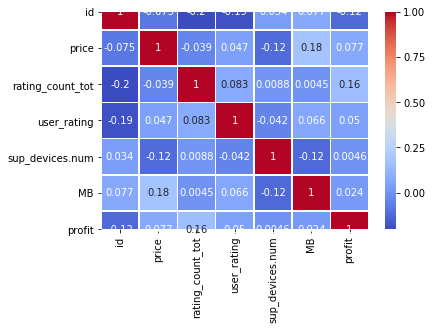

In [76]:
sns.set_palette("RdBu")
sns.heatmap(apple.corr(),linewidths=.5, annot=True, cmap='coolwarm'); #Price and MB seem a little related.

<Figure size 1080x504 with 0 Axes>

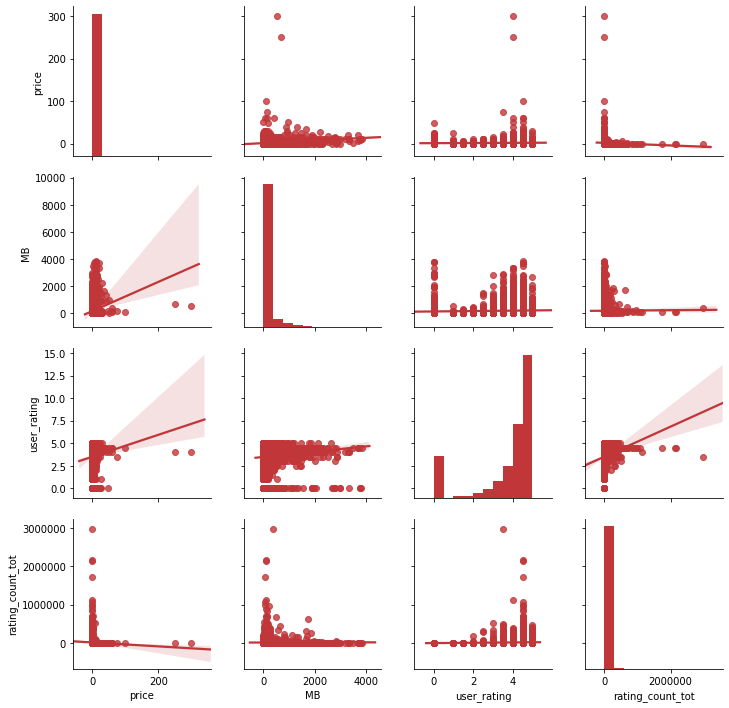

In [96]:
plt.figure(figsize = (15,7))
gr_pair=sns.pairplot(apple[['price', 'MB', 'user_rating',"rating_count_tot"]], kind="reg", markers="o")

In [94]:
apple.MB.corr(apple.price)

0.1823918710937715

### Which categories are in the majority in the App Store?

Text(0.5, 1.0, 'Categories')

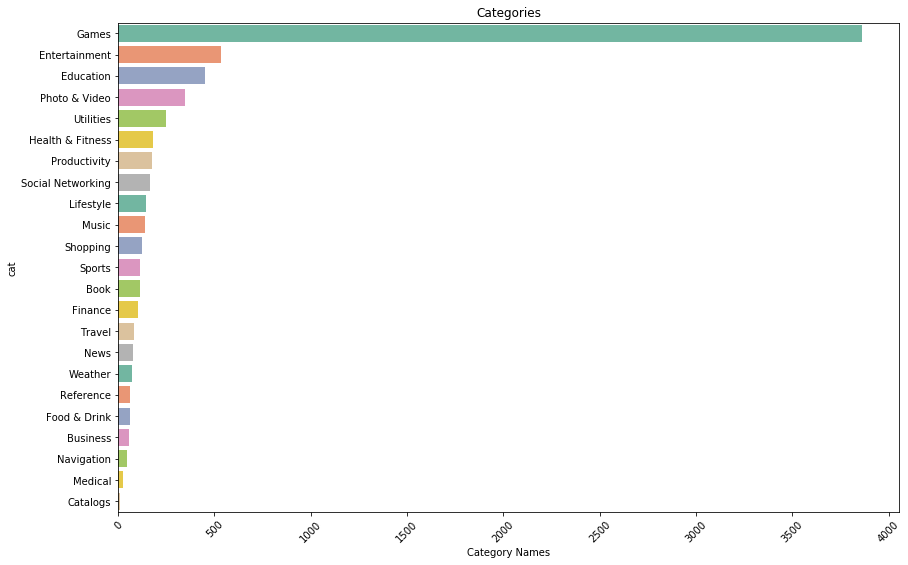

In [51]:
plt.figure(figsize=(14,9))
sns.countplot(y="cat",data=apple,palette="Set2",order=apple.cat.value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Category Names")
plt.title("Categories")

### Top 5 most rated applications (Based on a paid / free)

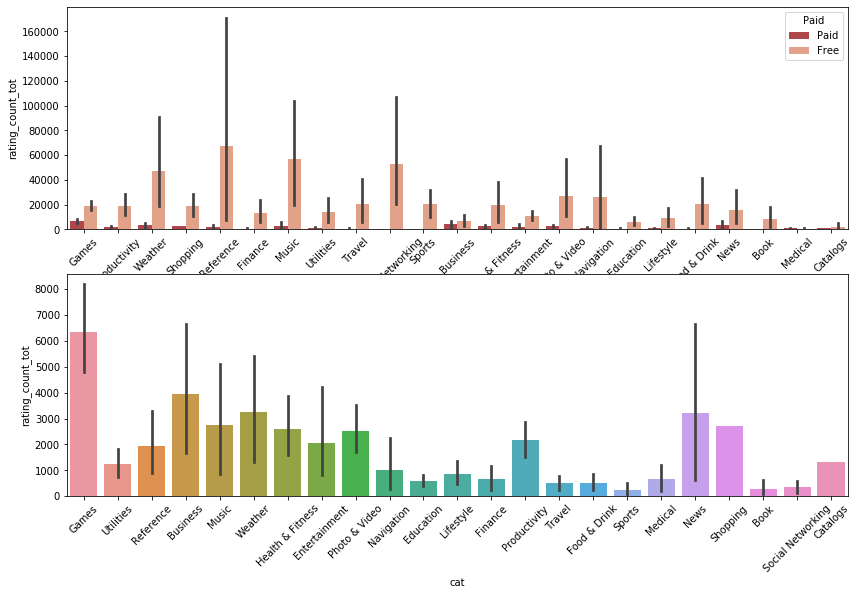

In [77]:
plt.figure(figsize=(14,9))

plt.subplot(2,1,1)
plt.xlabel("App Types")
plt.ylabel("Rating Count Total")
plt.xticks(rotation=45)
sns.barplot(x="cat",y="rating_count_tot",hue="Paid",data=apple)

plt.subplot(2,1,2)
#I am gonna look a little closer to the paid apps!
sns.barplot(x="cat",y="rating_count_tot",data=apple[apple["Paid"]=="Paid"])
plt.xticks(rotation=45);

Overall, most free apps have been voted on the chart (let's say it has been downloaded), which is no surprise. Reference in the free games category leads the way.
Games: As we saw in the chart, users prefer this category of paid applications. 

In paid applications, Business is ranked second after Games and Business is ranked 3rd with News and Weather.

In [55]:
apple[apple["Paid"]=="Paid"].groupby("cat").rating_count_tot.mean().sort_values(ascending=False).head(8)
#We can guess that Games are the most installed.

cat
Games               6333.624922
Business            3934.189189
Weather             3248.414634
News                3197.176471
Music               2759.197183
Shopping            2722.000000
Health & Fitness    2576.875000
Photo & Video       2517.659341
Name: rating_count_tot, dtype: float64

Text(0.5, 1.0, 'Profittable Categories')

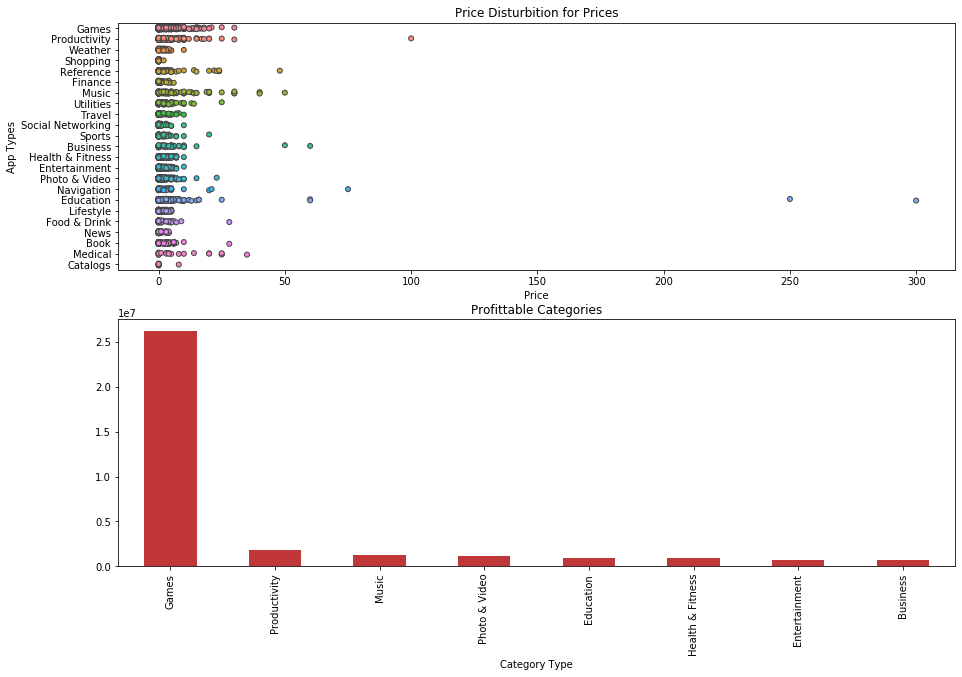

In [89]:
plt.figure(figsize=(15,10))
#plt.title("Profittable Categories")
plt.subplot(211)
a=sns.stripplot(x = apple["price"], y = apple["cat"], jitter=True, linewidth=1)
a.set_ylabel("App Types")
a.set_xlabel("Price")
a.set_title("Price Disturbition for Prices")
plt.subplot(212)

b=apple.groupby("cat").profit.sum().sort_values(ascending=False).head(8).plot(kind="bar")
b.set_xlabel("Category Type")
b.set_title("Profittable Categories")
 #Most profittable App is Games,too

## The best not free app category Oscar goes to...Games!

## What is the importance of size for a player who loves the game category?

[(0, 500)]

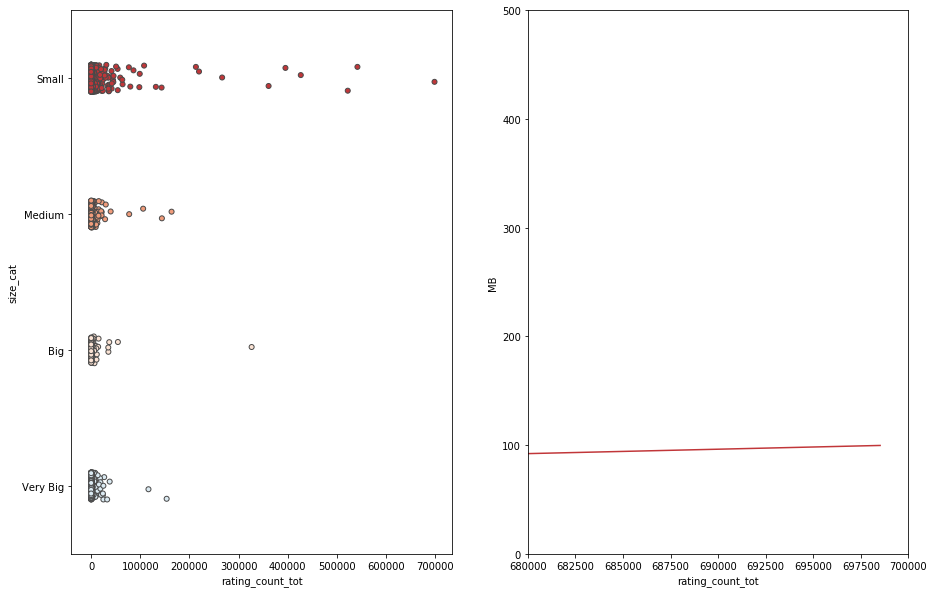

In [90]:
plt.figure(figsize=(15,10))
plt.subplot(121)
b=sns.stripplot(x = apple[(apple["Paid"]=="Paid")&(apple["cat"]=="Games")]["rating_count_tot"],
              y=apple[(apple["Paid"]=="Paid")&(apple["cat"]=="Games")]["size_cat"],
              jitter=True, linewidth=1)
#Small Size is better!
plt.subplot(122)
a=sns.lineplot(x="rating_count_tot", y="MB", data=apple[(apple["Paid"]=="Paid")&(apple["cat"]=="Games")])
a.set(xlim=(680000, 700000))
a.set(ylim=(0,500))

The user seems to prefer small sizes,İf i give range,i can say 1-100 MB looks good.

### So how much is the appropriate wage range?

Text(0.5, 1.0, 'Price (1$-9$) - Rating')

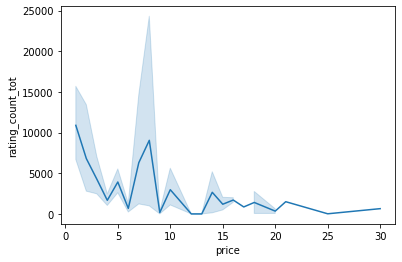

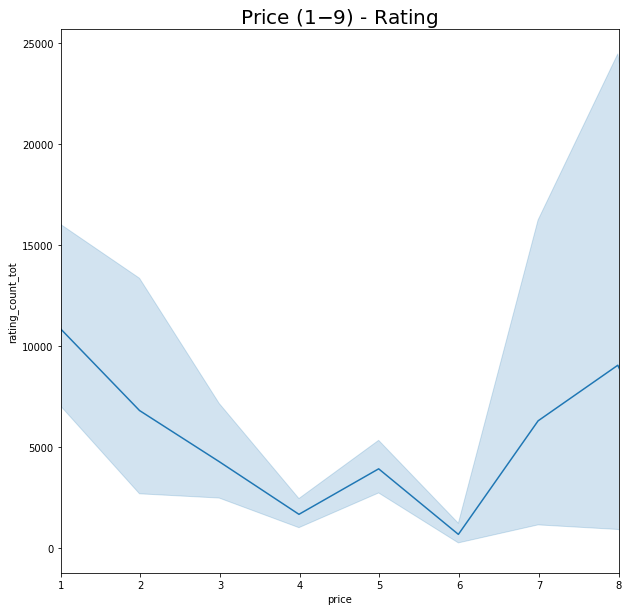

In [24]:
g = sns.lineplot(x="price", y="rating_count_tot", data=apple[(apple["Paid"]=="Paid")&(apple["cat"]=="Games")])

plt.figure(figsize=(10,10))
g = sns.lineplot(x="price", y="rating_count_tot",data=apple[(apple["Paid"]=="Paid")&(apple["cat"]=="Games")])
g.set(xlim=(1, 8))
plt.title('Price (1$-9$) - Rating',size = 20)

Well,i can guess this chart,there isnt strong relationship btw rating count and price.But if i give a suggestion,max price is 8 USD and min price 1 USD.

### Conclusion

**The Best Candidate of App Category:** GAMES

**The highest MB that should be selected** 100

**Best Price Range** :Min 1 Max 8



### FUTURE WORKS

1. Which words should I use for an effective description?. Do people look at the description while reviewing the application? Which words are the most mentioned in the definitions?

2. What is the effect of supported languages on the number of votes?

3. Emotion analysis from user comments